In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('clean_resume_data.csv')

In [3]:
df

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...
...,...,...,...
2479,99416532,AVIATION,rank sgt e non commissioned officer charge bri...
2480,24589765,AVIATION,government relations communications organizati...
2481,31605080,AVIATION,geek squad agent professional profile support ...
2482,21190805,AVIATION,program director office manager summary highly...


In [4]:
df.shape

(2484, 3)

In [5]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

<AxesSubplot:ylabel='count'>

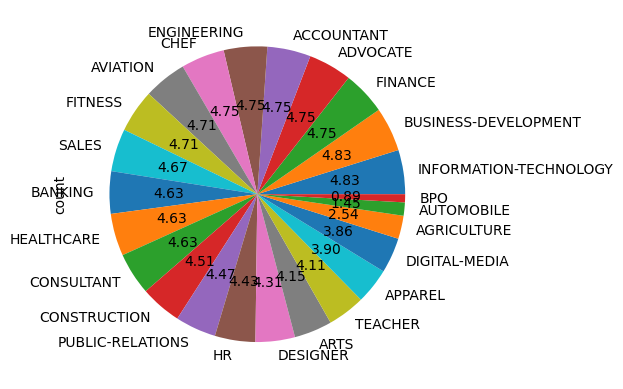

In [6]:
df['Category'].value_counts().plot(kind='pie', autopct='%.2f')

In [7]:
import matplotlib.pyplot as plt

In [8]:
df['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [9]:
from sklearn.utils import resample

#define the maximum count among all categories
max_count= df['Category'].value_counts().max()


#resample each category to match the maximum count
balanced_data= []

for category in df['Category'].unique():
    category_data= df[df['Category']== category]
    if (len(category_data)<max_count):
        #perform oversampling for categories with fewer samples
        balanced_category_data= resample(category_data, replace=True, n_samples=max_count, random_state=50)
    else:
        #perform undersampling for categories with more samples
        balanced_category_data= resample(category_data, replace=False, n_samples=max_count, random_state=50)
    
    balanced_data.append(balanced_category_data)

balanced_df= pd.concat(balanced_data)

In [10]:
balanced_df

,ID,Category,Feature
48,19867922,HR,hr generalist experience current provide gener...
96,15575117,HR,hr senior specialist career overview dedicated...
11,11480899,HR,hr manager summary human resources manager pra...
109,25150191,HR,hr contact center specialist summary forward t...
33,57667857,HR,hr consultant summary detail oriented years hu...
...,...,...,...
2394,14790629,AVIATION,senior manager customer support summary charis...
2417,19506295,AVIATION,lead engineer fluid systems thermal accessorie...
2425,11333001,AVIATION,operations technician summary multi faceted me...
2395,12144825,AVIATION,software engineering co summary highly skilled...


In [11]:
balanced_df['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
ARTS                      120
BANKING                   120
PUBLIC-RELATIONS          120
CONSTRUCTION              120
ACCOUNTANT                120
ENGINEERING               120
APPAREL                   120
FINANCE                   120
CHEF                      120
AUTOMOBILE                120
DIGITAL-MEDIA             120
CONSULTANT                120
SALES                     120
BPO                       120
AGRICULTURE               120
FITNESS                   120
HEALTHCARE                120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  120
TEACHER                   120
INFORMATION-TECHNOLOGY    120
AVIATION                  120
Name: count, dtype: int64

In [12]:
balanced_df.isnull().sum()

ID          0
Category    0
Feature     1
dtype: int64

In [13]:
balanced_df.dropna(inplace=True)

In [14]:
balanced_df.isnull().sum()

ID          0
Category    0
Feature     0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x= balanced_df['Feature']
y= balanced_df['Category']

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=50)

In [17]:
x_train

2038    public relations liaison sales representative ...
186     senior graphic designer summary diverse result...
940     financial institution examiner summary commiss...
2264    arts educator summary creative innovative art ...
1086    sales representative summary ambitious yard ma...
                              ...                        
1623    director engineering executive profile proacti...
1718    engineering technologist summary obtain positi...
1664    product marketing manager professional summary...
1270    media administrator professional summary artic...
1363    chef summary highly organized efficient fast p...
Name: Feature, Length: 2303, dtype: object

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfid= TfidfVectorizer()

In [20]:
x_train_tfid= tfid.fit_transform(x_train)
x_test_tfid= tfid.transform(x_test)

In [21]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [22]:
model_params= {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1, 5, 10, 15, 20],
            'kernel': ['linear', 'poly', 'rbf']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': range(1,6),
            'criterion': ['gini', 'entropy', 'log_loss']
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params':{
            'C': [1, 5, 10, 15, 10],
            'penalty': ['l1','l2'],
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(random_state= 0),
        'params':{
            'criterion': ['gini', 'entropy'],
            'max_depth':[1,2,3,4]
        }
    }
}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
scores= []

for model_name, mp in model_params.items():
    clf= GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train_tfid, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [25]:
score= pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
score

,model,best_score,best_params
0,svm,0.818939,"{'C': 5, 'kernel': 'linear'}"
1,random_forest,0.669553,"{'criterion': 'gini', 'n_estimators': 5}"
2,logistic_regression,0.847589,"{'C': 15, 'penalty': 'l1'}"
3,decision_tree,0.218416,"{'criterion': 'entropy', 'max_depth': 4}"


In [40]:
model = LogisticRegression(solver='liblinear', multi_class='auto', C=15, penalty='l1')
model.fit(x_train_tfid, y_train)

LogisticRegression(C=15, penalty='l1', solver='liblinear')

In [41]:
y_pred= model.predict(x_test_tfid)
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.890625


In [59]:
from io import StringIO
 
StringData = StringIO("""portfolio management supervision
    """)
 
x = pd.read_csv(StringData, sep =";")

test_tfid= tfid.transform(x)
y_pred= model.predict(test_tfid)
y_pred

array(['FITNESS'], dtype=object)

In [60]:
balanced_df.to_csv('clean_resume_data_balanced.csv', index = False)